# BHARAT INTERN-DATA SCIENCE

# DONE BY ROHITH.V

# TASK 1: STOCK PRICE PREDICTION

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df=pd.read_csv('aapl (1).csv')

In [41]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
1,2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2,2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
3,2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
4,2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79


In [42]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
6076,1984-09-13,27.50,27.62,27.50,27.50,7429600,3.14
6077,1984-09-12,26.87,27.00,26.12,26.12,4773600,2.98
6078,1984-09-11,26.62,27.37,26.62,26.87,5444000,3.07
6079,1984-09-10,26.50,26.62,25.87,26.37,2346400,3.01
6080,1984-09-07,26.50,26.87,26.25,26.50,2981600,3.02


In [43]:
df1=df.reset_index()['High']

In [44]:
df1.shape

(6081,)

In [45]:
df1

0       116.40
1       110.53
2       100.00
3        95.80
4        96.33
         ...  
6076     27.62
6077     27.00
6078     27.37
6079     26.62
6080     26.87
Name: High, Length: 6081, dtype: float64

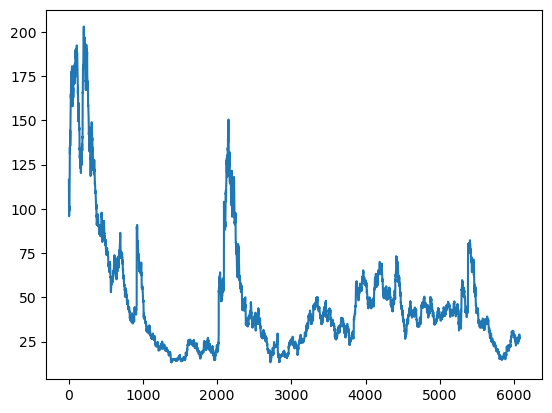

In [46]:
plt.plot(df1)

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [48]:
print(df1)

[[0.54386889]
 [0.51293671]
 [0.45744849]
 ...
 [0.07472203]
 [0.07076988]
 [0.07208726]]


In [49]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [50]:
training_size,test_size

(3952, 2129)

In [51]:
train_data

array([[0.54386889],
       [0.51293671],
       [0.45744849],
       ...,
       [0.23217579],
       [0.23286083],
       [0.23349318]])

In [52]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]    
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [53]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [54]:
print(X_train.shape), print(y_train.shape)

(3851, 100)
(3851,)


(None, None)

In [55]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [56]:
print(X_test.shape), print(ytest.shape)

(2028, 100, 1)
(2028,)


(None, None)

In [57]:
!pip install tensorflow

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [59]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
61/61 [==============================] - 21s 239ms/step - loss: 0.0055 - val_loss: 5.5257e-04
Epoch 2/100
61/61 [==============================] - 15s 238ms/step - loss: 0.0011 - val_loss: 4.4247e-04
Epoch 3/100
61/61 [==============================] - 13s 216ms/step - loss: 8.6707e-04 - val_loss: 3.4759e-04
Epoch 4/100
61/61 [==============================] - 13s 210ms/step - loss: 7.5225e-04 - val_loss: 3.2167e-04
Epoch 5/100
61/61 [==============================] - 13s 207ms/step - loss: 8.8997e-04 - val_loss: 3.8305e-04
Epoch 6/100
61/61 [==============================] - 12s 201ms/step - loss: 6.0538e-04 - val_loss: 3.1207e-04
Epoch 7/100
61/61 [==============================] - 14s 226ms/step - loss: 5.7145e-04 - val_loss: 2.9103e-04
Epoch 8/100
61/61 [==============================] - 15s 249ms/step - loss: 5.2734e-04 - val_loss: 2.4095e-04
Epoch 9/100
61/61 [==============================] - 14s 231ms/step - loss: 4.8344e-04 - val_loss: 2.5565e-04
Epoch 10/100
61/61

In [62]:
import tensorflow as tf

In [63]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

64/64 [==============================] - 3s 43ms/step


In [64]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [65]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

60.72410273241454

In [66]:
math.sqrt(mean_squared_error(ytest,test_predict))

43.58303636601834

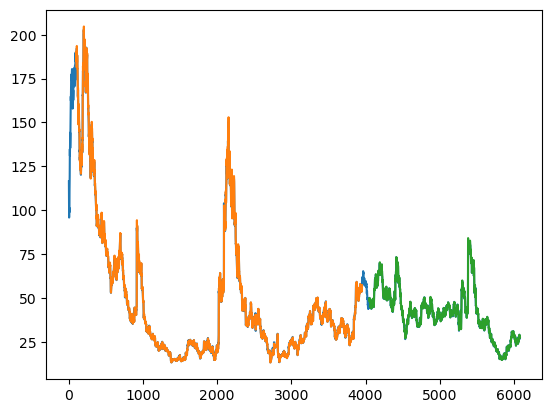

In [67]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [68]:
len(test_data)

2129

In [69]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 1788)

In [70]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [71]:
temp_input

[0.20319333930547506,
 0.20055857090161777,
 0.19265426569004585,
 0.19792380249776048,
 0.19528903409390314,
 0.1966064182958318,
 0.19597407387890609,
 0.19792380249776048,
 0.1992411866996891,
 0.1966064182958318,
 0.1966064182958318,
 0.18870211308425988,
 0.19001949728618855,
 0.19528903409390314,
 0.20055857090161777,
 0.1992411866996891,
 0.21178268430204988,
 0.2124150287189756,
 0.20319333930547506,
 0.20319333930547506,
 0.20846287611318964,
 0.21109764451704693,
 0.21109764451704693,
 0.21441745270590717,
 0.21636718132476157,
 0.2150497971228329,
 0.2124150287189756,
 0.22295410233440482,
 0.21900194972861886,
 0.21573483690783585,
 0.20319333930547506,
 0.20256099488854934,
 0.21636718132476157,
 0.22031933393054753,
 0.22031933393054753,
 0.2150497971228329,
 0.20582810770933235,
 0.1992411866996891,
 0.20319333930547506,
 0.1992411866996891,
 0.19528903409390314,
 0.19265426569004585,
 0.19528903409390314,
 0.19001949728618855,
 0.17753069505190494,
 0.17684565526690205,

In [72]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [73]:
len(df1)

6081

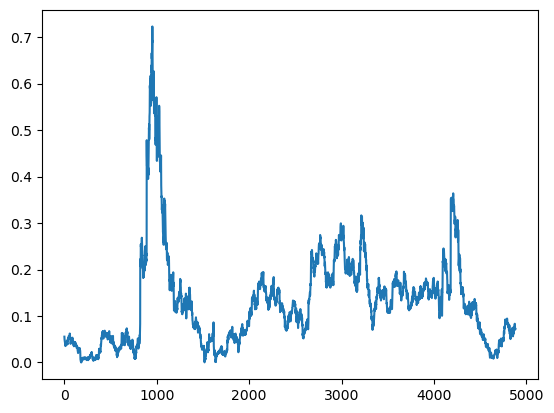

In [75]:
df3=df1.tolist()

plt.plot(df3[1200:])

In [76]:
df3=scaler.inverse_transform(df3).tolist()

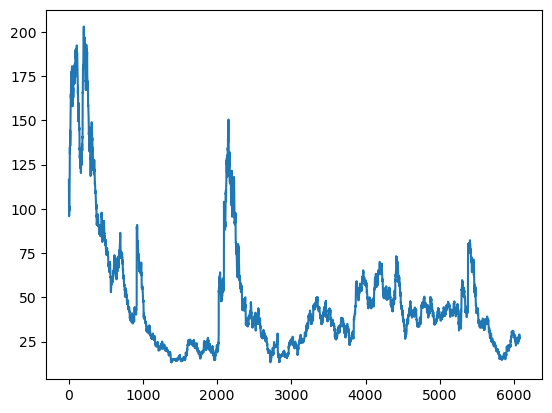

In [77]:
plt.plot(df3)